# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

# Assignment Video link:
https://drive.google.com/file/d/1CuPiUG0pCbQW_10ezfTr1PSL3IemgMNP/view?usp=sharing

In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np


In [ ]:
housing = load_boston() # Loading the housing data
#housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data = pd.DataFrame(housing["data"]) # Input data 
data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Part 1: Exploratory data analysis on Boston Housing Price Dataset

In [ ]:
# Exploratory data analysis on Boston Housing Price Dataset
# Summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# Missing Values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
# Basic Descriptive Statistics Value and the avg, max & min values of each column
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


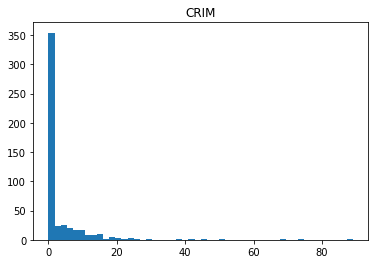

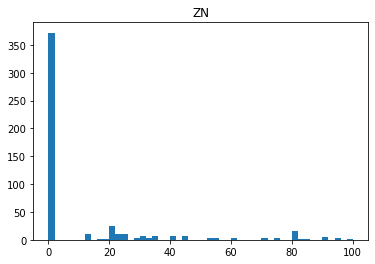

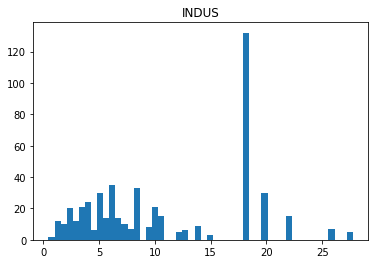

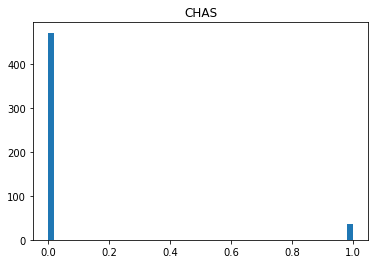

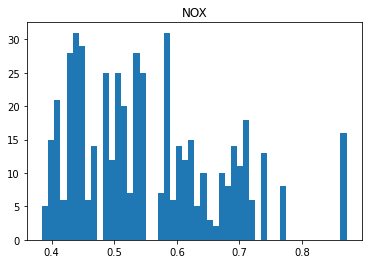

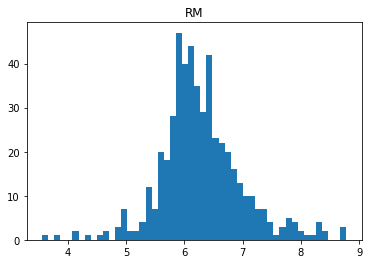

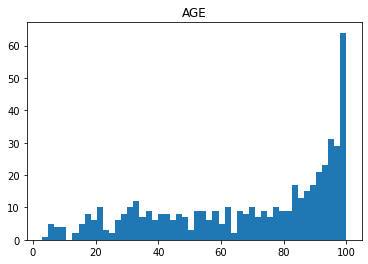

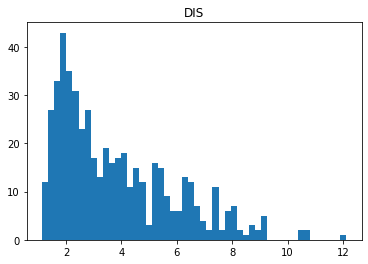

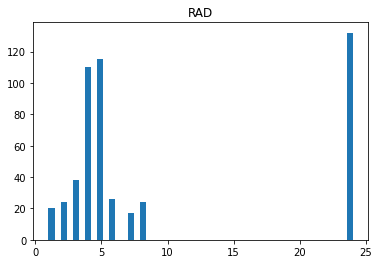

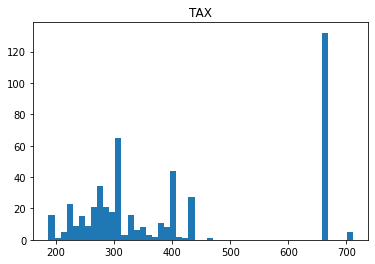

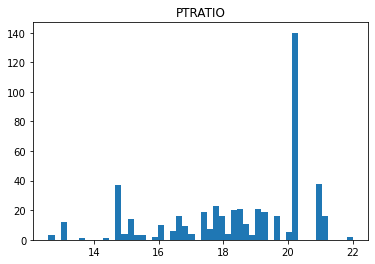

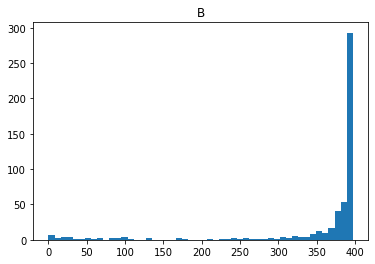

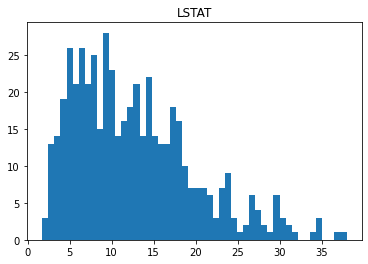

In [ ]:
# Histogram Distribution
import matplotlib.pylab as plt
for name in data.columns:
    plt.title(name)
    plt.hist(data[name], bins=50)
    plt.show()

From the above figure, we can infer that the data of “CHAS” and “RAD” are NOT continuous values. Generally, such data that is not continuous is called a categorical variable. For the above reasons, let’s check the categorical variables individually.

In [ ]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

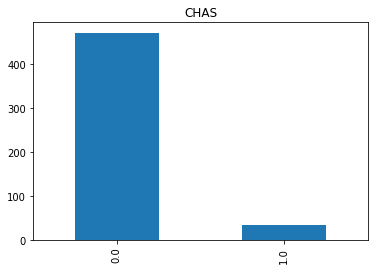

In [ ]:
# It is important to check the data visually.
data['CHAS'].value_counts().plot.bar(title="CHAS")

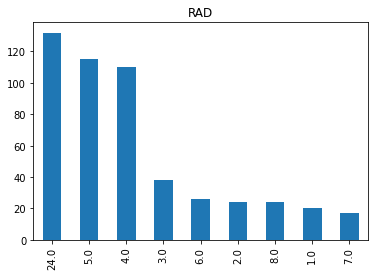

In [ ]:
data['RAD'].value_counts().plot.bar(title="RAD")

In [ ]:
# Correlation of Variables
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
import seaborn as sns

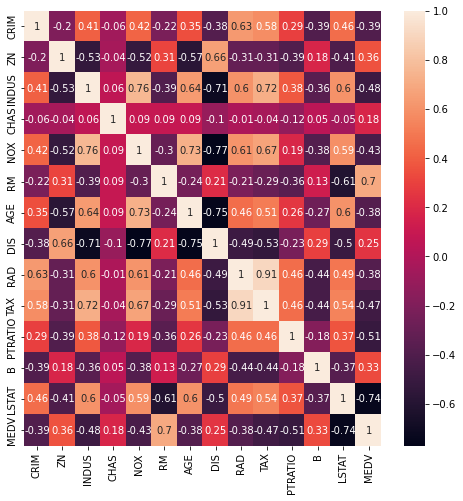

In [ ]:
data['MEDV'] = housing.target
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=ax)

Correlation of each column with target column.

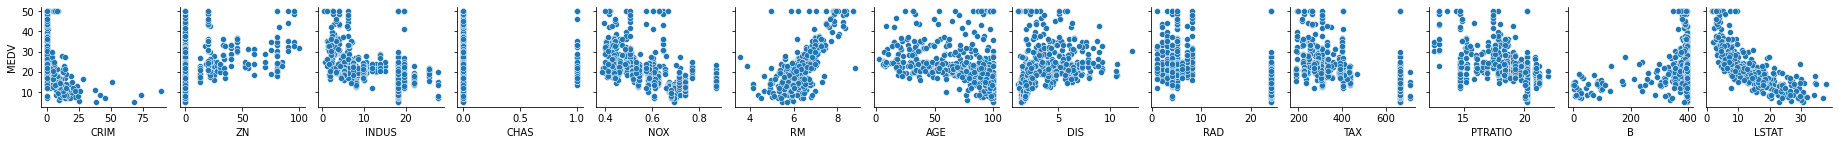

In [ ]:
sns.pairplot(data=data,y_vars=['MEDV'],x_vars=list(housing["feature_names"]),height=2)

# Part 2: Perform data pre-processing operations like standardization and splitting (80:20) of data.

In [ ]:
# Standardize and Splitting Dataset
def train_test_split(df1):
    shuffle_df1 = df1.sample(frac=1)
    train_size = int(0.8 * len(df1))
    df_train = shuffle_df1[:train_size]
    df_test = shuffle_df1[train_size:]
    return df_train,df_test
def dataset_split(df):
    X = df.drop([df.columns[-1]], axis = 1)
    y = df[df.columns[-1]]
    return X, y

# Standardize
for column in data:
    data[column] = (data[column] - data[column].mean()) / data[column].std()
data['Prices']=target
data_train,data_test=train_test_split(data)
X_train,y_train=dataset_split(data_train)
X_test,y_test=dataset_split(data_test)
X_test = X_test.drop(columns=['MEDV'])
X_train = X_train.drop(columns=['MEDV'])

In [ ]:
X_train=X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_test = (y_test-np.mean(y_test,axis=0))/np.std(y_test,axis=0)
y_train = (y_train-np.mean(y_train,axis=0))/np.std(y_train,axis=0)

In [ ]:
y_train = y_train.reshape(1,y_train.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])

In [ ]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (404, 13)
<class 'numpy.ndarray'> (1, 404)
<class 'numpy.ndarray'> (102, 13)
<class 'numpy.ndarray'> (1, 102)


# Part 3:Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. 
  
# Part 4: Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section.


Both part in one section

In [ ]:
# We will perform customized forward and backward propagation




# Define Abstract class
# class Layer():


# Define Fully connected Layer
# class FCLayer():

  # Forward Propagation

  # Backward Propagation



# Activation Layer (ReLU) 
# class ActivationLayer():
    # Forward Propagation

    # Backward Propagation

# Define activation function and its derivative
# Logistic


# Hyperbolic tangent


# Rectified linear
class MLP :
  def create(self,input_size,output_size,hidden_dims,output_type,seed=None,activation='sigmoid'):
    self.layer_dims=[input_size]+hidden_dims+[output_size]
    self.W = {}
    self.b = {}
    self.activation = activation
    self.output_type = output_type
    self.train_cost=[]
    self.L = len(self.layer_dims)-1

    if seed == None:
      np.random.seed(seed)

    for i in range(self.L):
      self.W[i+1] = np.random.randn(self.layer_dims[i+1],self.layer_dims[i])
      self.b[i+1] = np.zeros((self.layer_dims[i+1],1))
    for i in range(self.L):
      # self.W[i+1] = self.W[i+1]*np.sqrt(2/(self.layer_dims[i]))
      self.W[i+1] = self.W[i+1]*np.sqrt(1/(self.layer_dims[i]))

  def sigmoid(self,X):
    return 1/(1+np.exp(-X))

  def sigmoid_grad(self,X):
    return self.sigmoid(X)*(1-self.sigmoid(X))

  def tanh(self,X):
    return np.tanh(X)

  def tanh_grad(self,X):
    return 1-((self.tanh(X))**2)

  def forward_propagation(self,X,dropout=False):
    self.Z = {}
    self.A = {}

    self.A[0] = X

    for i in range (len(self.layer_dims)-2):
      self.Z[i+1] = np.matmul(self.W[i+1],self.A[i])+self.b[i+1]
      _ = "self.A[i+1] = self."+self.activation+"(self.Z[i+1])"
      exec(_)

    self.Z[self.L] = np.matmul(self.W[self.L],self.A[len(self.layer_dims)-2])+self.b[self.L]
    self.A[self.L] = self.Z[self.L] 
    return self.A


# Define Loss function (Use mean square error)
  def compute_cost(self,Y_pred,Y_true):
    cost =(1/(2*Y_true.shape[1]))*np.sum((Y_pred-Y_true)**2)
    return cost
  
  
  # Implement Backpropagation
  def backward_propagation(self,Y):
    self.dZ = {}
    self.dA = {}
    self.dW = {}
    self.db = {}

    self.dZ[self.L] = self.A[self.L]-Y

    for i in range(self.L,0,-1):

      self.dW[i] = (1/self.dZ[i].shape[1])*np.matmul(self.dZ[i],self.A[i-1].T)

      self.dW[i] += 0.1*self.W[i]
        
      self.db[i] = (1/self.dZ[i].shape[1])*np.sum(self.dZ[i],axis=1,keepdims=True)
      _ = "self.dZ[i-1] = np.matmul(self.W[i].T,self.dZ[i])*self."+self.activation+"_grad(self.A[i-1])"
      exec(_) 
      
    return (self.dW,self.db)


# Training Network
  def train(self,X_train,Y_train,X_val,Y_val,optimizer='gd',
            keep_probs=[],mini_batch_size=32,epochs=100,learning_rate=0.01,
            print_loss_freq=100,plot_loss=True):
    

    if keep_probs != []:
      self.keep_probs = keep_probs
    else:
      self.keep_probs = [1]*(len(self.layer_dims)-2)

    self.print_loss_freq = print_loss_freq  

    self.Mw = {}
    self.Mb = {}
    self.Vw = {}
    self.Vb = {}

    for i in range(self.L):
      self.Mw[i+1] = np.zeros(shape=self.W[i+1].shape)
      self.Mb[i+1] = np.zeros(shape=self.b[i+1].shape)
      self.Vw[i+1] = np.zeros(shape=self.W[i+1].shape)
      self.Vb[i+1] = np.zeros(shape=self.b[i+1].shape)

    # train_cost = []
    val_cost = []
    train_acc = []
    val_acc = []
    m = X_train.shape[1]

    drop = False
    # if(self.regularizer == 'dropout'):
    #   drop = True

    t = 1
    
    for e in range(epochs):

      mask = np.random.permutation(m)

      X_train = X_train[:,mask]
      Y_train = Y_train[:,mask]

      if optimizer == 'gd':

        for i in range(0,m,mini_batch_size):

          _ = self.forward_propagation(X_train[:,i:(i+mini_batch_size)],drop)
          _ = self.backward_propagation(Y_train[:,i:(i+mini_batch_size)])
          
          for i in range(self.L):
            self.W[i+1] -= learning_rate*self.dW[i+1]
            self.b[i+1] -= learning_rate*self.db[i+1]
      elif optimizer =='sgd':
        p= learning_rate / (1 + epochs * 1)
        for i in range(X_train.shape[1]):
          indexes = np.random.randint(0, m, mini_batch_size) # random sample
          Xs = np.take(X_train.T, indexes)
          ys = np.take(Y_train, indexes)
          _ = self.forward_propagation(X_train[:,i:(i+mini_batch_size)],drop)
          _ = self.backward_propagation(Y_train[:,i:(i+mini_batch_size)])
          
          for i in range(self.L):
            if learning_rate < 1*e^-7:
              p=learning_rate
            self.W[i+1] -= p*self.dW[i+1]
            self.b[i+1] -= p*self.db[i+1]

      Y_pred_train = self.forward_propagation(X_train)[self.L]
      Y_pred_val = self.forward_propagation(X_val)[self.L]
                                   
      self.train_cost.append(self.compute_cost(Y_pred_train,Y_train))
      val_cost.append(self.compute_cost(Y_pred_val,Y_val))

      if (e+1)%self.print_loss_freq==0:
        print("After "+str(e+1)+" epochs :    Training Loss = "+str(self.train_cost[e]) + 
                "    Validation Loss = "+str(val_cost[e])+'\n')  

    if plot_loss == True:

      r = list(range(1,epochs+1))
      plt.plot(r,self.train_cost,'r',label="Training Error")
      # plt.plot(r,val_cost,'b',label="Validation error")
      plt.xlabel('Epochs')
      if self.output_type == 'regression':
        plt.ylabel('Error')
      plt.legend()
      plt.show()

      print("\nTraining Error : ",self.train_cost[-1])
      # print("\nValidation Error : ",val_cost[-1]) 

    return (self.train_cost,val_cost,train_acc,val_acc)   

  def predict(self,X):
    A = self.forward_propagation(X)

    if self.output_type == 'regression':
      return A[self.L]

# Part 5: Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training.

#Using Batch Gradient descent:
Hyperparameter: learning rate is 0.01 and activation function is tanh and 100 epoch

After 100 epochs :    Training Loss = 0.24213285764262385    Validation Loss = 0.26282122828409255



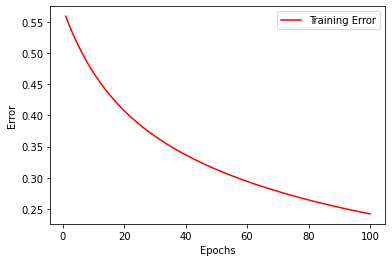


Training Error :  0.24213285764262385


In [ ]:
# Using Batch Gradient descent
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='gd',
                    mini_batch_size=X_train.shape[0],epochs=100,print_loss_freq=100,
                    learning_rate=0.01)

In [ ]:
Y_p = model.predict(X_test.T)
print("Test error value: ",model.compute_cost(Y_p,y_test.reshape(1,102)))

Test error value:  0.26282122828409255


In [ ]:
p=((y_test-np.mean(y_test))**2)
q=((y_test-Y_p)**2)
print("Model Accuracy using gradient: ",1-model.compute_cost(Y_p,y_test.reshape(1,102)))

Model Accuracy using gradient:  0.7371787717159075


#Using stochastic Gradient descent:
Hyperparameter: learning rate is 0.01 and activation function is tanh and iteration=100

After 10 epochs :    Training Loss = 0.2597066077181648    Validation Loss = 0.27642640978417393

After 20 epochs :    Training Loss = 0.19223653504972735    Validation Loss = 0.22090562340463812

After 30 epochs :    Training Loss = 0.1662105562223655    Validation Loss = 0.20525174739460422

After 40 epochs :    Training Loss = 0.1537410783181183    Validation Loss = 0.19897911877173774

After 50 epochs :    Training Loss = 0.1466433268679062    Validation Loss = 0.19490388936604475

After 60 epochs :    Training Loss = 0.14212293158983974    Validation Loss = 0.19163838607036915

After 70 epochs :    Training Loss = 0.13902812641633228    Validation Loss = 0.18913425691765004

After 80 epochs :    Training Loss = 0.13681346740842498    Validation Loss = 0.18724559127242105

After 90 epochs :    Training Loss = 0.13514114746908198    Validation Loss = 0.18557728348353295

After 100 epochs :    Training Loss = 0.13386557829644938    Validation Loss = 0.18419164616317546



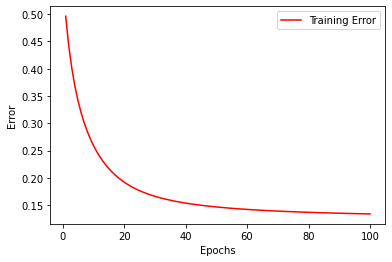


Training Error :  0.13386557829644938


In [ ]:
# Using stochastic gradeint descent
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=1,epochs=100,print_loss_freq=10,
                    learning_rate=0.01)

In [ ]:
# Test the Model
Y_p = model.predict(X_test.T)
print("Test model error: ",model.compute_cost(Y_p,y_test.reshape(1,102)))

Test model error:  0.18419164616317546


In [ ]:
p=((y_test-np.mean(y_test))**2)
q=((y_test-Y_p)**2)
# print(np.sum(q))
# print(np.sum(p))
# print(np.sum(q)/np.sum(p))
print("Model Accuracy using stochastic gradient descent: ",1-model.compute_cost(Y_p,y_test.reshape(1,102)))

Model Accuracy using stochastic gradient descent:  0.8158083538368246


#Part 6: Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]

Hyperparameter of best model used in this experiment is: Activation function Tanh, epoch is 100 and optimizer is Stochastic gradient descent.

In [ ]:
# Using the best model for learning rate 0.0001
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=1,epochs=100,print_loss_freq=10,
                    learning_rate=0.0001,plot_loss=False)
st1=model.train_cost
Y_p = model.predict(X_test.T)
pt1=1-model.compute_cost(Y_p,y_test.reshape(1,102))

After 10 epochs :    Training Loss = 0.5993541051571812    Validation Loss = 0.4785864003803781

After 20 epochs :    Training Loss = 0.5949608231788628    Validation Loss = 0.4751224027294551

After 30 epochs :    Training Loss = 0.5906245553962188    Validation Loss = 0.4717096709052863

After 40 epochs :    Training Loss = 0.5863443152183051    Validation Loss = 0.46834724107746317

After 50 epochs :    Training Loss = 0.5821192262278253    Validation Loss = 0.4650342466209493

After 60 epochs :    Training Loss = 0.5779483599134627    Validation Loss = 0.4617697836629075

After 70 epochs :    Training Loss = 0.5738308230075    Validation Loss = 0.458552977325446

After 80 epochs :    Training Loss = 0.5697657984486874    Validation Loss = 0.4553830186513496

After 90 epochs :    Training Loss = 0.565752403602012    Validation Loss = 0.45225905173037956

After 100 epochs :    Training Loss = 0.5617897903886007    Validation Loss = 0.44918025087352753



In [ ]:
# Using the best model for learning rate 0.001
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=1,epochs=100,print_loss_freq=10,
                    learning_rate=0.001,plot_loss=False)
st2=model.train_cost
Y_p = model.predict(X_test.T)
pt2=1-model.compute_cost(Y_p,y_test.reshape(1,102))

After 10 epochs :    Training Loss = 0.49331809512327957    Validation Loss = 0.39606876104859795

After 20 epochs :    Training Loss = 0.4590375949814968    Validation Loss = 0.36873081505602145

After 30 epochs :    Training Loss = 0.4292532352309382    Validation Loss = 0.34531979407134666

After 40 epochs :    Training Loss = 0.40321333285936306    Validation Loss = 0.32514495633719276

After 50 epochs :    Training Loss = 0.3803247911389378    Validation Loss = 0.3076705377993499

After 60 epochs :    Training Loss = 0.3601171940664601    Validation Loss = 0.29247023183071835

After 70 epochs :    Training Loss = 0.34220789546695696    Validation Loss = 0.2792033685260852

After 80 epochs :    Training Loss = 0.3262814326366549    Validation Loss = 0.26758951069862563

After 90 epochs :    Training Loss = 0.3120761347390833    Validation Loss = 0.2573988326119898

After 100 epochs :    Training Loss = 0.2993720958060583    Validation Loss = 0.24843886379797886



In [ ]:
# Using the best model for learning rate 0.01
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=1,epochs=100,print_loss_freq=10,
                    learning_rate=0.01,plot_loss=False)
st3=model.train_cost
Y_p = model.predict(X_test.T)
pt3=1-model.compute_cost(Y_p,y_test.reshape(1,102))

After 10 epochs :    Training Loss = 0.2598477484089368    Validation Loss = 0.26439102129273895

After 20 epochs :    Training Loss = 0.20958592998554176    Validation Loss = 0.23131660992842837

After 30 epochs :    Training Loss = 0.18513562741170714    Validation Loss = 0.21608180926227852

After 40 epochs :    Training Loss = 0.1714711295133349    Validation Loss = 0.20767220073286102

After 50 epochs :    Training Loss = 0.16291755711856062    Validation Loss = 0.20257816850653346

After 60 epochs :    Training Loss = 0.15701605827549847    Validation Loss = 0.19895338085132114

After 70 epochs :    Training Loss = 0.1526334189611355    Validation Loss = 0.19610715791182884

After 80 epochs :    Training Loss = 0.14921118662444458    Validation Loss = 0.1938590414578775

After 90 epochs :    Training Loss = 0.14642381881811578    Validation Loss = 0.19186097972795454

After 100 epochs :    Training Loss = 0.1440886417581656    Validation Loss = 0.1900420209576167



In [ ]:
# Using the best model for learning rate 0.1
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=4,epochs=100,print_loss_freq=10,
                    learning_rate=0.1,plot_loss=False)
st4=model.train_cost
Y_p = model.predict(X_test.T)
pt4=1-model.compute_cost(Y_p,y_test.reshape(1,102))

After 10 epochs :    Training Loss = 0.1337756038513549    Validation Loss = 0.18723639654834578

After 20 epochs :    Training Loss = 0.12840569005245    Validation Loss = 0.1854287739397162

After 30 epochs :    Training Loss = 0.12676808072319945    Validation Loss = 0.1760098895593928

After 40 epochs :    Training Loss = 0.12660360069350465    Validation Loss = 0.17457628588778887

After 50 epochs :    Training Loss = 0.1268056088185742    Validation Loss = 0.17880058599302262

After 60 epochs :    Training Loss = 0.1255924298209631    Validation Loss = 0.1754779187190178

After 70 epochs :    Training Loss = 0.12543664349478947    Validation Loss = 0.17815389076398078

After 80 epochs :    Training Loss = 0.12464905556529376    Validation Loss = 0.17482431050422392

After 90 epochs :    Training Loss = 0.12402339825644612    Validation Loss = 0.17759043582759498

After 100 epochs :    Training Loss = 0.12294629310380363    Validation Loss = 0.17431711736825256



In [ ]:
# Using the best model for learning rate 0.5
model = MLP()

model.create(13,1,[15,],output_type='regression',activation='tanh')

costs = model.train(X_train.T,y_train,X_test.T,y_test,optimizer='sgd',
                    mini_batch_size=4,epochs=100,print_loss_freq=10,
                    learning_rate=0.5,plot_loss=False)
st5=model.train_cost
Y_p = model.predict(X_test.T)
pt5=1-model.compute_cost(Y_p,y_test.reshape(1,102))

After 10 epochs :    Training Loss = 0.1266739285927515    Validation Loss = 0.1817232952519979

After 20 epochs :    Training Loss = 0.12344288876703842    Validation Loss = 0.18275474135665268

After 30 epochs :    Training Loss = 0.1226321270278885    Validation Loss = 0.17884270369661712

After 40 epochs :    Training Loss = 0.12650377323790127    Validation Loss = 0.18705816538084669

After 50 epochs :    Training Loss = 0.11557815594158764    Validation Loss = 0.16735921222926015

After 60 epochs :    Training Loss = 0.11399467623998376    Validation Loss = 0.1699236987884185

After 70 epochs :    Training Loss = 0.11831455171749002    Validation Loss = 0.17033077521941398

After 80 epochs :    Training Loss = 0.11882145650509529    Validation Loss = 0.18093979863625187

After 90 epochs :    Training Loss = 0.11807410916040945    Validation Loss = 0.17822582927086586

After 100 epochs :    Training Loss = 0.11361138199050388    Validation Loss = 0.1738142719438746



# Part 7: Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate.

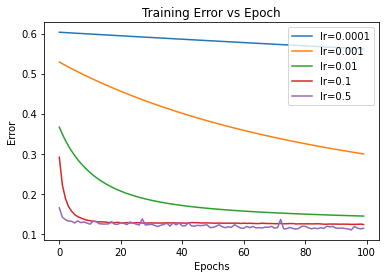

In [ ]:
# Plots
# Plot for training error against each learning rate
r =list(range(1,101))
plt.plot(st1,label="lr=0.0001")
plt.plot(st2,label="lr=0.001")
plt.plot(st3,label="lr=0.01")
plt.plot(st4,label="lr=0.1")
plt.plot(st5,label="lr=0.5")
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.title("Training Error vs Epoch")
# plt.legend(['train','test'], loc='upper left')
plt.show()



In [ ]:
#print(pt1,pt2,pt3,pt4,pt5)

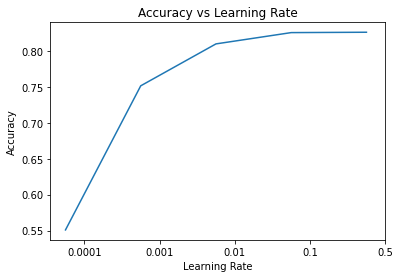

In [ ]:
# Plot for training accuracy against each learning rate
r =list(range(1,6))
q=[pt1,pt2,pt3,pt4,pt5]
plt.plot(r,q)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks([r + 0.25 for r in range(1,len(q)+1)],['0.0001','0.001','0.01','0.1','0.5'])
# plt.legend(loc='upper right')
# plt.legend(['train','test'], loc='upper left')
plt.title("Accuracy vs Learning Rate")
plt.show()

In [ ]:
# Challenges and Observations

#Part 7: Observation
1. From above experiment on different learning rate we can observe that high learning rate for a regression type of problem solving model can cause unexpected behaviour for learning cure of a neural network model. 

2.  We know that the learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

3. The plots show oscillations in behavior for the too-large learning rate of 0.5 and the inability of the model to learn anything with the too-small learning rates of 0.0001. 

4. On several experiment it has been found that learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. 

5. The challenge of training deep learning neural networks involves carefully selecting the learning rate. It may be the most important hyperparameter for the model. 

6.  Above experiment gives us a nice intution about how a learning rate for a model should be chosen. As we can see for our model learning rate of value 0.01 semms to be well tuned for all of the experiment. Along with SGD optimizer and Tanh activation function gives us a preety good result for this problem.




---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [ ]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist
import numpy as np

In [ ]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Part 1: Explore the Dataset. Display one randomly selected image from each fashion class.

Train dataset shape:  (60000, 28, 28)
Test dataset shape:  (10000, 28, 28)
Number of Classes:  10


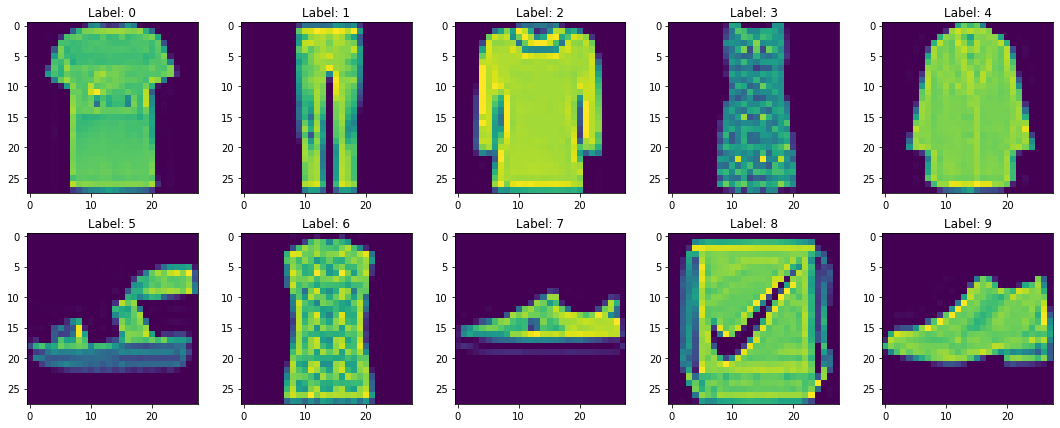

In [ ]:
#Dataset Exploration
import matplotlib.pylab as plt
(x_train, y_train), (x_test, y_test)=fashion_data
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Train dataset shape: ",x_train.shape)
print("Test dataset shape: ",x_test.shape)
print("Number of Classes: ",len(np.unique(y_train)))
fig, axes = plt.subplots(2, 5, figsize=(3*5,3*2))
for i in range(len(np.unique(y_train))):
  indx=np.random.choice(np.where(y_train==i)[0])
  ax = axes[i//5, i%5]
  ax.imshow(np.squeeze(x_train[indx])) #,cmap=plt.get_cmap('gray'))
  ax.set_title('Label: {}'.format(y_train[indx]))
plt.tight_layout()
plt.show()

# Part 2: Plot the distribution of number of images in each fashion class.

In [ ]:
# Plot the distribution of number of images in each fashion class
labels_map = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    unique, counts = np.unique(data, return_counts=True)
    label_counts=dict(zip(unique, counts))
    #label_counts = data.value_counts()
    print(label_counts)
    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels_map[i]
        count = label_counts[i]
        #count=np.where(y_train==i)[0]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

print("Class distribution of train data: ")
get_classes_distribution(y_train)
print("Class distribution of test data: ")
get_classes_distribution(y_test)

Class distribution of train data: 
{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
T-shirt/top         :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Class distribution of test data: 
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Ankle Boot          :   100

Class distribution plot of test data: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


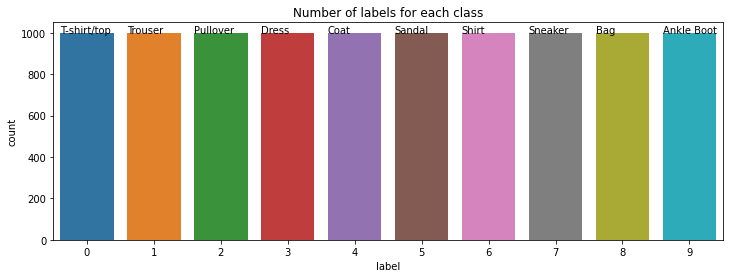

Class distribution plot of train data: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


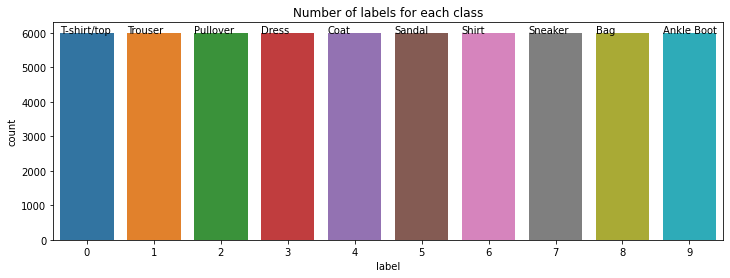

In [ ]:
#print(y_test.label)
import pandas as pd
import seaborn as sns
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = [x for x in range(10)])
    g.set_title("Number of labels for each class")
    i=0
    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels_map[i], (p.get_x(), p.get_height()+0.1))
        i+=1
    plt.show()  
df = pd.DataFrame(y_test,columns =["label"])
print("Class distribution plot of test data: ")
plot_label_per_class(df)
df = pd.DataFrame(y_train,columns =["label"])   
print("Class distribution plot of train data: ")
plot_label_per_class(df)

# Part 2: Observation 
1. From above distribution plot and also the data extrated from the given dataset we can see that all data points of test dataset and train dataset is equally distributed among all the classes. 
2. For train dataset all classes have 6000 data points each and in test data all classes has 1000 data points each.

So, using this experiment we can ensure that dataset is uniformly distributed among each class of this dataset.

# Part 3:
# Implememnt the 2D convolution function using a kernel size of 3x3. Use the sobel kernel and display the feature map for one example from each fashion class.

In [ ]:

def convolution(image, kernel, average=False):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output = np.zeros(image.shape)
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    return output


In [ ]:
# Sobel Kernel
def sobel_kernel(image, filter):
    new_image_x = convolution(image, filter)
    new_image_y = convolution(image, np.flip(filter.T, axis=0))
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    return gradient_magnitude

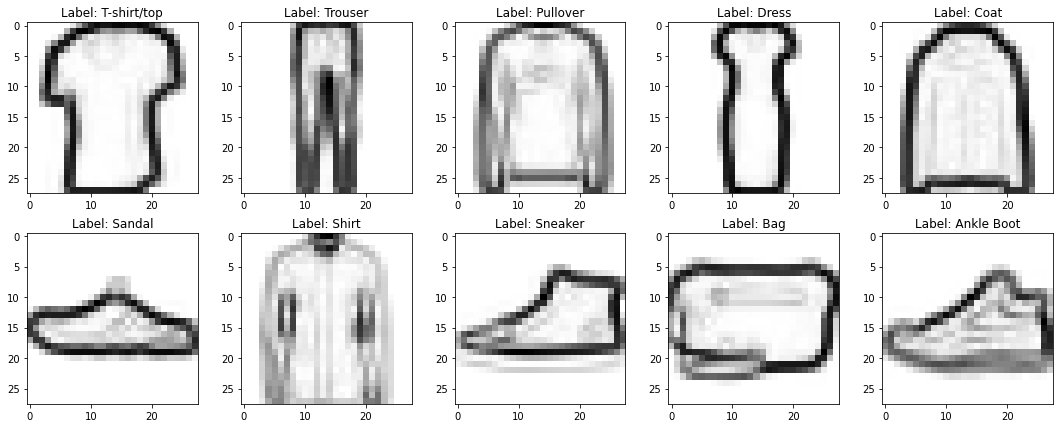

In [ ]:
# Display the feature map for one example from each fashion class
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
fig, axes = plt.subplots(2, 5, figsize=(3*5,3*2))
for i in range(len(np.unique(y_train))):
  indx=np.random.choice(np.where(y_train==i)[0])
  ax = axes[i//5, i%5]
  a=sobel_kernel(x_train[indx], filter)
  ax.imshow(np.squeeze(a),cmap=plt.cm.binary) #,cmap=plt.get_cmap('gray'))
  ax.set_title('Label: {}'.format(labels_map[y_train[indx]]))
plt.tight_layout()
plt.show()


# Part 4: Using the Keras library, implement a CNN model for classification.

In [ ]:
# Model Structure 
model = keras.models.Sequential()
model.add(
        keras.layers.Conv2D(
        filters=32, # How many filters we will learn 
        kernel_size=(3, 3), # Size of feature map that will slide over image
        #strides=(1, 1), # How the feature map "steps" across the image
        #padding='valid', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1) # The expected input shape for this layer
    )
) 
model.add(
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        #strides=(2, 2) # How the pool "steps" across the feature
    )
)
model.add(
        keras.layers.Conv2D(
        filters=64, # How many filters we will learn 
        kernel_size=(3, 3), # Size of feature map that will slide over image
        #strides=(1, 1), # How the feature map "steps" across the image
        #padding='valid', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
        #input_shape=(28, 28, 1) # The expected input shape for this layer
    )
)
model.add(
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        #strides=(2, 2) # How the pool "steps" across the feature
    )
)
model.add(
    keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)
model.add(
    keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features 
# to the required class.
# model.add(
#     tf.keras.layers.Dense(
#         units=128, # Output shape
#         activation='relu' # Rectified Linear Unit Activation Function
#     )
# )
model.add(
    keras.layers.Dense(
        units=10, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)


# Part 5: Implement a custom cross-entropy loss (error function) for the multi-class classification

In [ ]:
# Implement a custom cross-entropy loss (error function) for the multi-class classification
import tensorflow as tf
def cross_entropy(y,y_pre):
  # print("y true shape",y.shape, y)
  # print("y pred shape",y_pre.shape, y_pre)
  #y=tf.cast(y, tf.float32)
  # print("y true shape",y)
  loss=-tf.math.reduce_sum(y*tf.math.log(y_pre))
  # print("y pred shape",y_pre.shape, y_pre)
  return loss/float(y_pre.shape[1])

# Part 6: Compile and train your model with four different optimizers viz. SGD RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers

In [ ]:
# Training of the model 
# With adagrad optimizer
model.compile(
    loss=cross_entropy, # loss function
    optimizer='adagrad', # optimizer function
    metrics=['accuracy'] # reporting metric
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
#print(x_train.shape)
# Train the CNN on the training data
history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, y_train,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=256, 

      # An epoch is an iteration over the entire training data.
      epochs=10,

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      #validation_split=0.2, 
      validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 41s 173ms/step - loss: 37.7496 - accuracy: 0.5186 - val_loss: 24.7091 - val_accuracy: 0.6920
Epoch 2/10
235/235 [==============================] - 42s 178ms/step - loss: 23.4519 - accuracy: 0.6708 - val_loss: 20.3656 - val_accuracy: 0.7302
Epoch 3/10
235/235 [==============================] - 47s 201ms/step - loss: 20.6209 - accuracy: 0.7108 - val_loss: 18.7680 - val_accuracy: 0.7431
Epoch 4/10
235/235 [==============================] - 41s 175ms/step - loss: 19.2283 - accuracy: 0.7257 - val_loss: 17.8410 - val_accuracy: 0.7502
Epoch 5/10
235/235 [==============================] - 41s 175ms/step - loss: 18.3601 - accuracy: 0.7372 - val_loss: 17.1677 - val_accuracy: 0.7552
Epoch 6/10
235/235 [==============================] - 43s 183ms/step - loss: 17.6735 - accuracy: 0.7473 - val_loss: 16.6273 - val_accuracy: 0.7617
Epoch 7/10
235/235 [==============================] - 41s 174ms/step - loss: 17.1443 - accuracy: 0.7541 - val_loss: 16

(60000, 10)


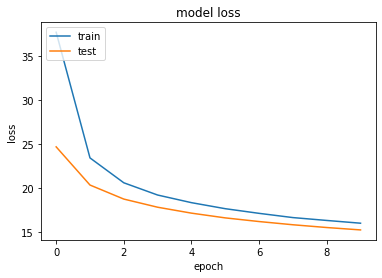

In [ ]:
## Plots
for_adagrad=history.history['loss']
print(y_train.shape)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Epoch 1/10
235/235 [==============================] - 46s 193ms/step - loss: 25.6838 - accuracy: 0.6697 - val_loss: 13.5942 - val_accuracy: 0.8094
Epoch 2/10
235/235 [==============================] - 38s 162ms/step - loss: 13.6566 - accuracy: 0.8023 - val_loss: 12.5896 - val_accuracy: 0.8236
Epoch 3/10
235/235 [==============================] - 39s 166ms/step - loss: 12.3522 - accuracy: 0.8224 - val_loss: 11.4223 - val_accuracy: 0.8381
Epoch 4/10
235/235 [==============================] - 40s 169ms/step - loss: 11.7020 - accuracy: 0.8326 - val_loss: 11.4956 - val_accuracy: 0.8321
Epoch 5/10
235/235 [==============================] - 38s 163ms/step - loss: 11.2495 - accuracy: 0.8388 - val_loss: 10.8162 - val_accuracy: 0.8473
Epoch 6/10
235/235 [==============================] - 38s 163ms/step - loss: 10.9676 - accuracy: 0.8431 - val_loss: 10.6768 - val_accuracy: 0.8489
Epoch 7/10
235/235 [==============================] - 38s 163ms/step - loss: 10.6770 - accuracy: 0.8463 - val_loss: 10

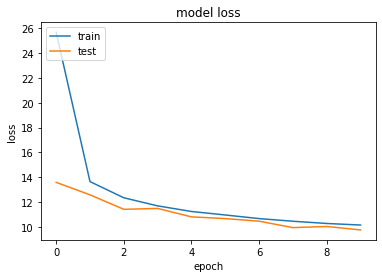

In [ ]:
# with SGD optimizer
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
model.compile(
    loss=cross_entropy, # loss function
    optimizer='sgd', # optimizer function
    metrics=['accuracy'] # reporting metric
)
#print(model.summary())
history = model.fit(x_train, y_train,batch_size=256, epochs=10, validation_data=(x_test, y_test))
for_sgd=history.history['loss']
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

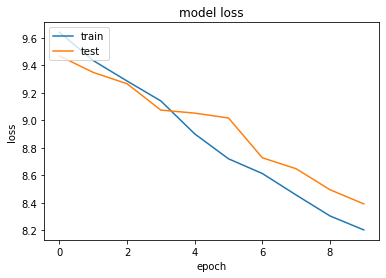

In [ ]:
# RmsProp
model.compile(
    loss=cross_entropy, # loss function
    optimizer='rmsprop', # optimizer function
    metrics=['accuracy'] # reporting metric
)
# print(model.summary())
print(model.summary())
history = model.fit(x_train, y_train,batch_size=256, epochs=10,validation_data=(x_test, y_test))
for_rmsprop=history.history['loss']
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

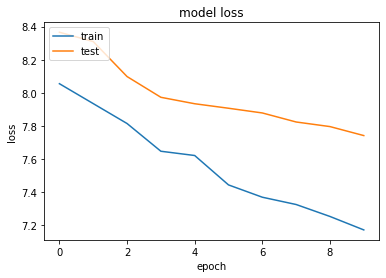

In [ ]:
# With Adam optimizer
model.compile(
    loss=cross_entropy, # loss function
    optimizer='adam', # optimizer function
    metrics=['accuracy'] # reporting metric
)
# print(model.summary())
print(model.summary())
history = model.fit(x_train, y_train,batch_size=256, epochs=10,validation_data=(x_test, y_test))
for_adam=history.history['loss']
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

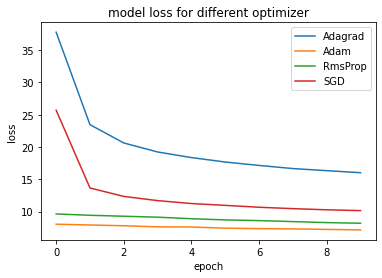

In [ ]:
# Plot of training loss for different optimizer
plt.plot(for_adagrad)
plt.plot(for_adam)
plt.plot(for_rmsprop)
plt.plot(for_sgd)
plt.title('model loss for different optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adagrad', 'Adam','RmsProp','SGD'], loc='upper right')
plt.show()

# Part 6: Observation
1.  From above error graph plot and also above individual error graph plot we observe that Adam optimizer has produced some of the best result using this dataset. 

2.  Although this optimizer is computationally costly but this method is too fast and converges rapidly. It also rectifies vanishing learning rate, high variance quickly. 

3.  We have also noticed that Adagrad has worst result compared to the all other optimizer as the learning rate is always decreasing results in slow training. 

4.  For SGD we can say that it has high variance in model parameters and may shoot even after achieving global minima.If we want to get the same convergence as gradient descent we need to slowly reduce the value of learning rate.

5.  Although RmsProp also produces some good result, but in some senarios it may fall behind Adam as Adam optimizer combines the heuristics of both Momentum and RMSProp.

Adam is the best optimizers if one wants to train the neural network in less time and more efficiently.

# Part 7: Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model.

Hyperparameter: 3 convolutional layer size 32, 64, 128 and kernal size 3X3 and activation function as relu, 2 maxpooling layer with size (2,2), 2 dropout layer with dropout rate 0.5, one flatten layer, one dense layer with unit=128, and one output layer with softmax activation function. we have compile this code with adam optimizer and custom cross entropy function and fit the model with batch size 512 and 30 epochs.

In [ ]:
conv1 = keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = keras.layers.Conv2D(64, (3,3), activation='relu')
conv3 = keras.layers.Conv2D(128, (3,3), activation='relu')
max_pool_1 = keras.layers.MaxPooling2D((2,2))
max_pool_2 = keras.layers.MaxPooling2D((2,2))
max_pool_3 = keras.layers.MaxPooling2D((2,2))
flat_layer = keras.layers.Flatten()
fc = keras.layers.Dense(128, activation='relu')
output = keras.layers.Dense(10, 'softmax')
drop_1 = keras.layers.Dropout(0.5)
drop_2 = keras.layers.Dropout(0.5)
drop_3 = keras.layers.Dropout(0.5)
#model = keras.models.Sequential()

new_model = keras.models.Sequential()

new_model.add(conv1)
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                  

In [ ]:
new_model.compile(optimizer='adam',
              loss=cross_entropy,
              metrics=['accuracy'])
history=new_model.fit(x_train, y_train, epochs=30, batch_size=512, shuffle=True, validation_split=0.2)

Epoch 1/30
94/94 [==============================] - 161s 2s/step - loss: 42.0540 - accuracy: 0.6945 - val_loss: 25.7270 - val_accuracy: 0.8153
Epoch 2/30
94/94 [==============================] - 159s 2s/step - loss: 24.3850 - accuracy: 0.8238 - val_loss: 20.2965 - val_accuracy: 0.8574
Epoch 3/30
94/94 [==============================] - 159s 2s/step - loss: 20.8048 - accuracy: 0.8515 - val_loss: 18.2264 - val_accuracy: 0.8740
Epoch 4/30
94/94 [==============================] - 160s 2s/step - loss: 18.9652 - accuracy: 0.8665 - val_loss: 17.1048 - val_accuracy: 0.8821
Epoch 5/30
94/94 [==============================] - 160s 2s/step - loss: 17.3448 - accuracy: 0.8754 - val_loss: 15.5336 - val_accuracy: 0.8909
Epoch 6/30
94/94 [==============================] - 159s 2s/step - loss: 16.2765 - accuracy: 0.8856 - val_loss: 14.8308 - val_accuracy: 0.8973
Epoch 7/30
94/94 [==============================] - 159s 2s/step - loss: 15.2092 - accuracy: 0.8922 - val_loss: 13.6521 - val_accuracy: 0.9049

In [ ]:
test_loss, test_accuracy = new_model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.6568 - accuracy: 0.9276


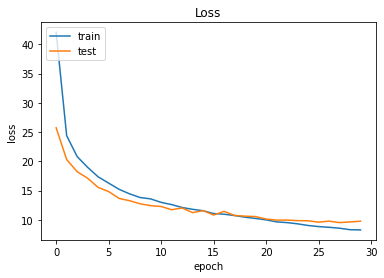

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

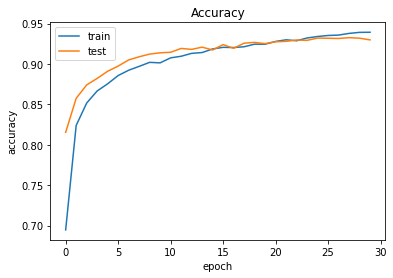

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Challenges and observations

#Part 7: Challenges
1.  If we want to increase the number of Conv2D layer and maxplooing we can but it  will make the evaluation model more complex. 
2.  Eventually it creates limitation such that it will be somewhat more time taking as the model complexity goes on. 
3.  And sometimes using of 5 convolutional layers or more cannot create any type of improvement if you run the model less number of epochs. 

So we have to balance the model complexity as well as number of epochs to get the best performance out of it. 

# Part 7: Observation and Analysis


1.   From above experiment we can say that we have achieved some amount of performance improment compared to what the default model was given in the question.

2.   We have already mentioned that Adam optimizer can give better result so we have chosen that for this experiment. Also as mentioned in the question we have tried to change the hyperparameters for this experiment. Such that, we have used 3 Convolutional layer with different sizes of 32, 64 and 128 with relu activation. Along with 2 maxpooling layer of size 2X2 and 2 dropout layer of value 0.5. And we have also used two dense l flatten layer and one dense layer with relu activation function and size 128. At last we have used one output layer with 10 units and softmax activation function.

3.   We have noticed that after running for 30 epochs it produced some significant improvement in classification using this model. 

4.   The addition of one Conv2D layer and maxpolling layer although makes the model complex but eventually it generating good output for our experiment. 

5.   Also we have to run for more about 100 epochs to get effective accuracy using these models. 

So we can say that  even with these model configuration we can see more improvement if we train it for more number of epochs.